In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:, [3, 4]].values

In [4]:
from sklearn.cluster import OPTICS
op=OPTICS(eps=5, min_samples=5)
label=op.fit_predict(X)
labels=op.labels_

In [5]:
reachability_distances = op.reachability_
reachability_distances
#print('The reachability distances:',reachability_distances)
core_distances = op.core_distances_
core_distances
#print('The core distance:',core_distances)

array([12.80624847,  6.40312424,  8.54400375,  4.47213595, 12.52996409,
        4.47213595,  7.28010989, 13.34166406, 10.04987562,  5.83095189,
        8.54400375, 15.65247584,  9.21954446,  5.09901951,  8.06225775,
        5.38516481,  7.21110255,  8.60232527,  6.32455532, 12.52996409,
        6.40312424,  6.        ,  8.06225775,  6.40312424,  8.06225775,
        9.21954446,  7.61577311, 12.16552506,  8.94427191, 10.29563014,
       10.44030651,  7.28010989, 11.18033989, 11.18033989, 10.44030651,
        8.06225775, 12.08304597,  9.        ,  9.48683298, 10.19803903,
        7.28010989, 14.14213562,  6.40312424,  6.08276253, 10.44030651,
        9.43398113,  5.83095189,  5.        ,  5.        ,  5.        ,
        4.12310563,  5.38516481,  3.60555128,  5.        ,  4.        ,
        5.09901951,  4.        ,  4.12310563,  2.23606798,  3.16227766,
        3.60555128,  3.16227766,  3.16227766,  4.12310563,  2.82842712,
        3.60555128,  2.23606798,  2.82842712,  3.60555128,  3.  

In [6]:
predecessor_indices = op.predecessor_
predecessor_indices

array([ -1,   3,  14,   9,   0,   3,  14,  19,   6,  23,  14,  19,  24,
         3,  24,   3,   4,   9,  16,  33,  18,  13,   6,  37,  36,  15,
        18,  17,  18,  35,  22,  21,  22,  29,  24,  31,  38,  45,  28,
        31,  38,  29,  40,  53,  40,  51,  52,  48,  42,  48,  52,  53,
        61,  63,  48,  54,  58,  54,  66,  54,  61,  62,  66,  60,  66,
        60,  67,  59,  60,  67,  61,  59,  66,  70,  77,  78,  78,  72,
        77,  83,  76,  76,  83,  77,  75,  83,  87,  81,  86,  96,  87,
        98,  95,  98,  98,  90,  92,  92, 108,  92, 105,  92, 104,  90,
        90,  94,  99, 101, 107,  99, 106, 110, 105, 109, 109, 106, 108,
       102, 112, 117, 117, 112, 117, 135, 126, 129, 121, 141, 144, 133,
       128, 133, 126, 122, 130, 143, 130, 133, 136, 137, 136, 149, 146,
       161, 150, 141, 126, 137, 124, 143, 148, 143, 150, 147, 150, 143,
       140, 147, 140, 139, 146, 157, 140, 149, 166, 153, 176, 163, 166,
       177, 172, 165, 162, 163, 170, 173, 174, 165, 174, 173, 18

In [7]:
space = np.arange(len(X))
reachability = op.reachability_[op.ordering_]
labels = op.labels_[op.ordering_]

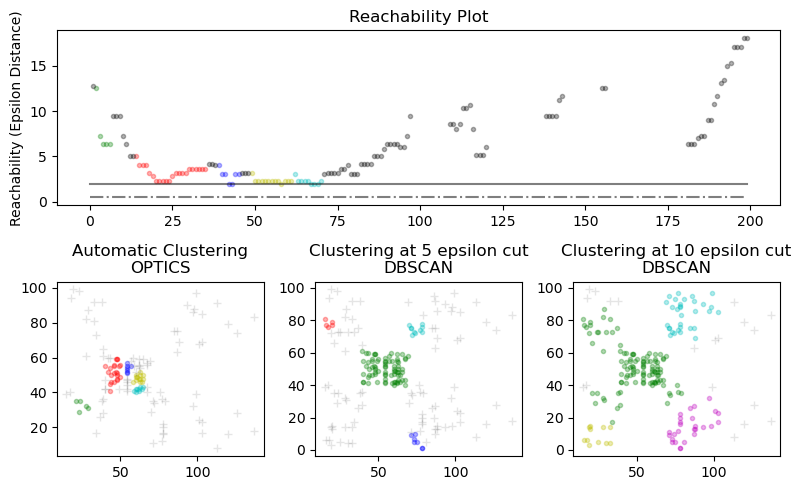

In [8]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(8, 5))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (Epsilon Distance)")
ax1.set_title("Reachability Plot")


#OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[op.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[op.labels_ == -1, 0], X[op.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 5 & 10

labels_050 = cluster_optics_dbscan(
    reachability=op.reachability_,
    core_distances=op.core_distances_,
    ordering=op.ordering_,
    eps=5,
)
labels_200 = cluster_optics_dbscan(
    reachability=op.reachability_,
    core_distances=op.core_distances_,
    ordering=op.ordering_,
    eps=10,
)


colors = ["g.", "r.", "b.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 5 epsilon cut\nDBSCAN")


colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 10 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

In [9]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,8
3,4,Female,23,16,77,5
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


/Users/viswanathanmuthu/anaconda3/envs/AIVE_Course/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/viswanathanmuthu/anaconda3/envs/AIVE_Course/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


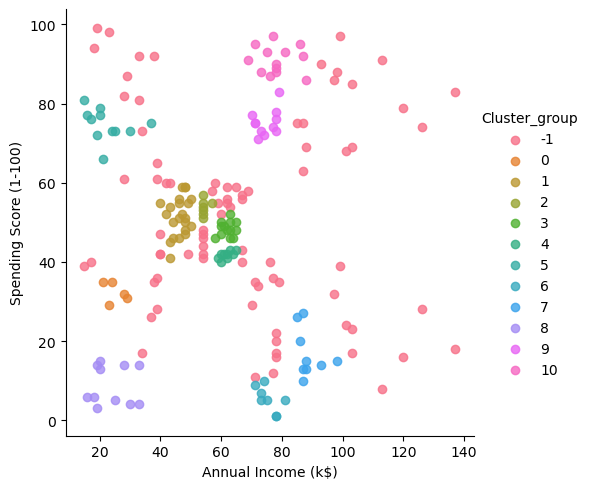

In [10]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], fit_reg=False, legend=True, legend_out=True)

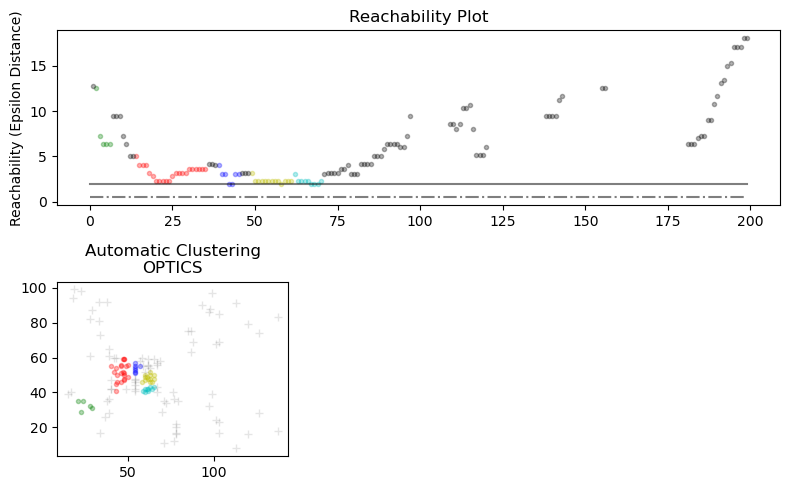

In [11]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(8, 5))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])


# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (Epsilon Distance)")
ax1.set_title("Reachability Plot")


#OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[op.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[op.labels_ == -1, 0], X[op.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")
plt.tight_layout()
plt.show()